In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
# from sklearn.manifold import TSNE
# import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

from alignment import TrivialAlignment, CCA, ManifoldLinear#, manifold_nonlinear
from correspondence import Correspondence
from distance import SquaredL2
from neighborhood import neighbor_graph
from util import pairwise_error, Timer
# from viz import show_alignment
from warping import manifold_warping_linear

from rpy2.robjects import r
import rpy2.robjects.pandas2ri as pandas2ri

In [2]:
file = "../../data/expr.RData"
rf = r['load'](file)

dayExpr = pandas2ri.ri2py_dataframe(r['dayExpr'])
nightExpr = pandas2ri.ri2py_dataframe(r['nightExpr'])

X = dayExpr.as_matrix()
Y = nightExpr.as_matrix()
n = 17695
d = 3

/home/dnguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/dnguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [3]:
X_normalized = preprocessing.normalize(X, norm='l2').T
Y_normalized = preprocessing.normalize(Y, norm='l2')[0:13, :].T

corr = Correspondence(matrix=np.eye(n))
Wx = neighbor_graph(X_normalized, k=5)
Wy = neighbor_graph(Y_normalized, k=5)

In [4]:
lin_aligners = (
    ('no alignment', lambda: TrivialAlignment(X_normalized, Y_normalized, d)),
    ('cca', lambda: CCA(X_normalized, Y_normalized, corr, d)),
    ('linear manifold', lambda: ManifoldLinear(X_normalized, Y_normalized, corr, d, Wx, Wy)),
#     ('manifold warping', lambda: manifold_warping_linear(X_normalized, Y_normalized, d, Wx, Wy)[1]),
)

In [5]:
disMat = np.empty((0,313113025), float)
metric = SquaredL2

In [6]:
for name, aln in lin_aligners:
    with Timer(name):
        Xnew, Ynew = aln().project(X_normalized, Y_normalized)
    print (' sum sq. error =', pairwise_error(Xnew, Ynew, metric=SquaredL2))
    disMat = np.vstack((disMat, metric.between(Xnew/Xnew.max(), Ynew/Ynew.max()).flatten()))

no alignment : 0.001 seconds
 sum sq. error = 1010.1441564836526
cca : 22.578 seconds
 sum sq. error = 93.06893094686065
linear manifold : 37.466 seconds
 sum sq. error = 127.99525660815365


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

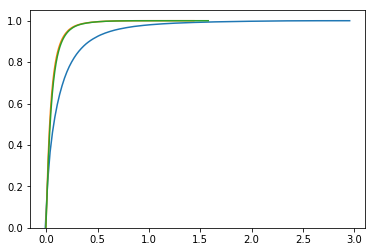

In [11]:
sns.distplot(disMat[0], hist=False, kde_kws=dict(cumulative=True))
sns.distplot(disMat[1], hist=False, kde_kws=dict(cumulative=True))
sns.distplot(disMat[2], hist=False, kde_kws=dict(cumulative=True))

In [ ]:
sns_plot = sns.distplot(disMat[0], hist=False, kde_kws=dict(cumulative=True))
sns_plot = sns.distplot(disMat[1], hist=False, kde_kws=dict(cumulative=True))
sns_plot.savefig("output.png")

In [ ]:
sns.distplot(disMat[0], kde_kws=dict(cumulative=True))

/home/dnguyen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [15]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('../../figs/cdf.pdf')
pyplot.ion()

In [ ]:
sns.distplot(disMat[0], kde_kws=dict(cumulative=True))
pyplot.draw()
pp.savefig()

/home/dnguyen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


no alignment : 0.004 seconds
 sum sq. error = 1010.1441564836526
cca : 28.508 seconds
 sum sq. error = 454.9137760775018
linear manifold : 54.263 seconds
 sum sq. error = 127.99525660815291
manifold warping : 4216.778 seconds
 sum sq. error = 107.632944402541


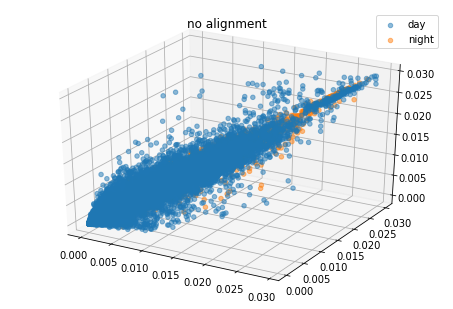

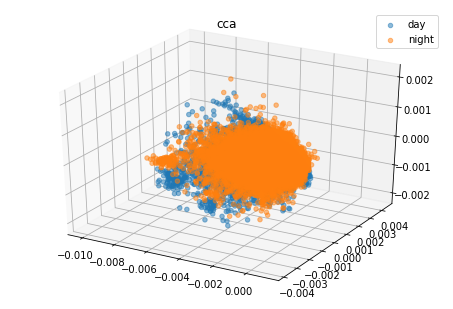

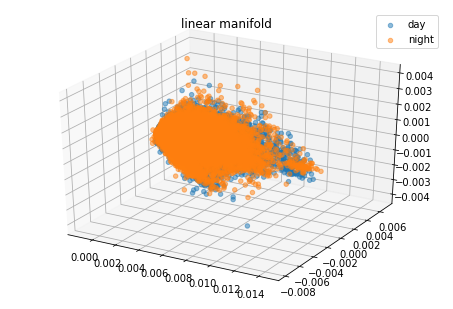

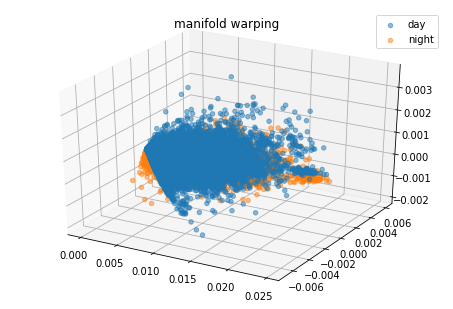

In [8]:
for name, aln in lin_aligners:
    pyplot.figure()
    with Timer(name):
        Xnew, Ynew = aln().project(X_normalized, Y_normalized)
    print (' sum sq. error =', pairwise_error(Xnew, Ynew, metric=SquaredL2))
    show_alignment(Xnew, Ynew, 'day', 'night', name)
    pyplot.draw()

<function matplotlib.pyplot.show>

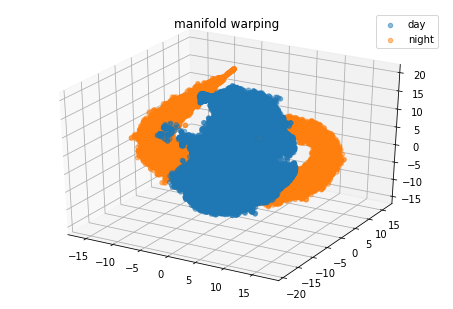

In [23]:
X_embedded = TSNE(n_components=3, perplexity=100).fit_transform(X_normalized)
Y_embedded = TSNE(n_components=3, perplexity=100).fit_transform(Y_normalized)
show_alignment(X_embedded, Y_embedded, 'day', 'night', name)

<function matplotlib.pyplot.show>

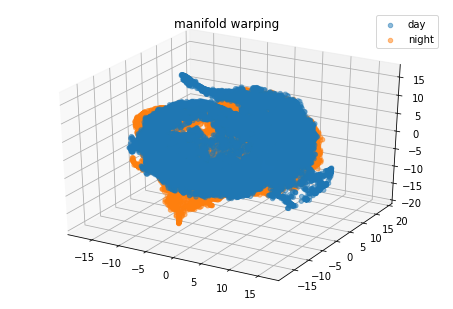

In [25]:
X_embedded_ = TSNE(n_components=3, perplexity=100).fit_transform(Xnew)
Y_embedded_ = TSNE(n_components=3, perplexity=100).fit_transform(Ynew)
show_alignment(X_embedded_, Y_embedded_, 'day', 'night', name)

In [26]:
disMat = np.empty((0,313113025), float)

In [27]:
disMat = np.vstack((disMat, metric.between(Xnew/Xnew.max(), Ynew/Ynew.max()).flatten()))

In [ ]:
disMat3 = disMat
%store disMat3
del disMat3

In [ ]:
x = np.random.randn(200)
y = np.random.randn(100)
sns.distplot(x,
             hist=False,
             kde_kws=dict(cumulative=True))
sns.distplot(y,
             hist=False,
             kde_kws=dict(cumulative=True))

In [10]:
disMat.shape

(3, 313113025)

In [12]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=3)
cca.fit(X_normalized, Y_normalized)
X_c, Y_c = cca.transform(X_normalized, Y_normalized)

In [13]:
pairwise_error(X_c, Y_c, metric=SquaredL2)

193.19418458325868

In [14]:
from alignment import manifold_nonlinear
from warping import manifold_warping_nonlinear, manifold_warping_twostep

In [16]:
other_aligners = (
    ('nonlinear manifold aln', lambda: manifold_nonlinear(X_normalized, Y_normalized, corr, d, Wx, Wy)),
    ('nonlinear manifold warp', lambda: manifold_warping_nonlinear(X_normalized, Y_normalized, d, Wx, Wy)[1:]),
    ('manifold warping two-step', lambda: manifold_warping_twostep(X_normalized, Y_normalized, d, Wx, Wy)[1:]),
)

In [17]:
for name, aln in other_aligners:
    pyplot.figure()
    with Timer(name):
        Xnew, Ynew = aln()
    print (' sum sq. error =', pairwise_error(Xnew, Ynew, metric=SquaredL2))
    show_alignment(Xnew, Ynew, 'day', 'night', name)

/home/dnguyen/ManiNetCluster/inst/python/alignment.py:27: RuntimeWarning: invalid value encountered in true_divide
  vecs[:,i] /= np.linalg.norm(vecs[:,i])


nonlinear manifold aln : 89.559 seconds
 sum sq. error = nan


NameError: name 'show_alignment' is not defined

<Figure size 432x288 with 0 Axes>

In [18]:
Xnew

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])